# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.645510e+01     1.272044e+01
 * time: 0.001667022705078125
     1     3.004888e+01     5.728471e+00
 * time: 0.0073320865631103516
     2     2.736198e+01     4.716488e+00
 * time: 0.012347936630249023
     3     2.239937e+01     2.484675e+00
 * time: 0.017254114151000977
     4     2.096044e+01     2.239619e+00
 * time: 0.022192955017089844
     5     2.000030e+01     1.455842e+00
 * time: 0.027091026306152344
     6     1.991620e+01     3.171540e+00
 * time: 0.031183958053588867
     7     1.989216e+01     3.226027e+00
 * time: 0.035288095474243164
     8     1.901656e+01     2.053367e+00
 * time: 0.039335012435913086
     9     1.836471e+01     1.713107e+00
 * time: 0.04339289665222168
    10     1.805842e+01     1.869781e+00
 * time: 0.0475161075592041
    11     1.766295e+01     1.289304e+00
 * time: 0.051614999771118164
    12     1.736713e+01     9.626153e-01
 * time: 0.09982991218566895
    13     1.722974e+01     7.439040e-0

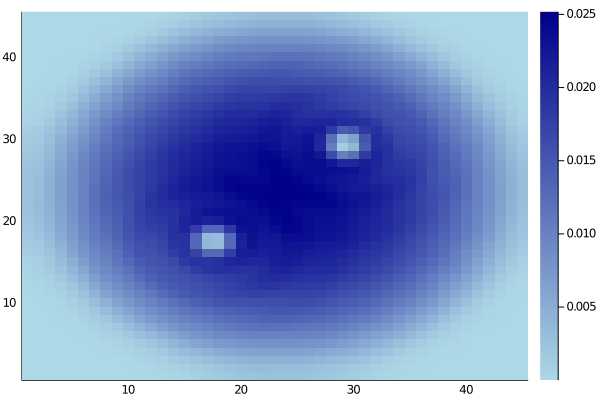

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)